Seaborn est une bibliothèque Python pour la visualisation de données, spécialisée dans l'analyse statistique. Basée sur la bibliothèque Matplotlib, elle est totalement adaptée aux data frames de Pandas. Ainsi, au delà d'une interface visuellement améliorée, Seaborn permet de produire rapidement et intuitivement des graphiques statistiques de qualité.

De plus, Seaborn utilise des thèmes par défaut esthétiquement agréable, et permet de créer facilement ses propres palettes de couleurs. Seaborn permet ainsi d'apprendre à connaître un jeu de données de manière rapide et efficace.

Cependant, Seaborn a plus vocation à compléter la bibliothèque Matplotlib qu'à la remplacer. Ainsi, vu que la plupart des fonctions de la première utilise des fonctions de la seconde, certaines modifications ou personnalisations requerront l'appel à Matplotlib.

Les données utilisées dans cette formation proviennent d'un jeu de données concernant des joueurs de NBA et leurs performances pour la saison 2013-2014. Le dataset contient une vingtaine de variables qui correspondent pour la plupart aux caractéristiques relatives aux profils des joueurs et de leurs équipes, ainsi qu'à leurs performances sur le terrain.

Parmis les 21 variables, on a entre autres pour chaque joueur:

player : Prénom et Nom du joueur
age: L'âge du joueur au début de la saison
pos: Le poste du joeur au sein de son équipe: Meneur(PG: point guard), Arrière(SG: shooting guard), Pivot(C: center) etc..
g : Nombre de matchs joués
gs: Nombre de matchs débutés
mp: Nombre de minutes joués par saison
fg.: Pourcentage de field goals (paniers tirés autres que lancers francs) réussis
tov: Nombre de récupération de ballon
po : NP si l'équipe n'a pas atteint les playoffs, FT si elle a atteint les deux premiers tours des playoffs, F si elle a atteint la finale de sa conference.
conf : La "conférence" à laquelle l'équipe appartient (Est/Ouest)
etc...

Toutes les abréviations utilisées concernant le basket-ball sont définies ici.

Importer les packages numpy, pandas et matplotlib.pyplot.
Importer seaborn sous son abréviation commune sns.
Lire dans un data frame appelé df, le fichier 'nba_sb2.csv', en utilisant la première colonne comme indices.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

df = pd.read_csv('Seaborn/nba_sb2.csv', index_col= 0)

In [6]:
## Exécuter pour activer le thème par défaut de Seaborn
sns.set_theme()

Lorsque l'on s'intéresse à une seule variable d'un data frame, la première étape à effectuer est l'analyse de sa distribution.

Pour une variable numérique continue, le graphique le plus communément utilisé est l'histogramme.
La fonction displot de seaborn permet de visualiser la distribution d'une variable continue en affichant un histogramme de la variable. Il est également possible d'ajouter l'estimation par noyau de sa densité.

Les intervalles de l'histogramme sont calculés de manière automatique mais peuvent être donnés à l'aide l'argument bins. Le seul argument obligatoire est la série/le vecteur/la liste contenant la variable que l'on souhaite visualiser. Si la séquence est un objet Pandas, le nom de la variable est automatiquement ajouté au label de l'axe sur lequel la variable est affichée.

La fonction displot permet en réalité d'afficher au choix un histogramme, une estimation de la densité par méthode de noyau, et/ou une fonction de répartition empirique (ECDF), grâce au paramètre kind qui prend réspectivement en argument les valeurs "hist" (par défaut), "kde" et "ecdf".

En mode histogramme, il est également possible d'ajouter une courbe d'estimation de la densité ou un rug plot (qui ajoute les points au graphique sous forme de petites tiges verticales), grâce aux arguments booléens kde et rug.

Le graphique peut également être personnalisé à l'aide des paramètres color ou vertical pour changer la couleur ou l'orientation du graphique.

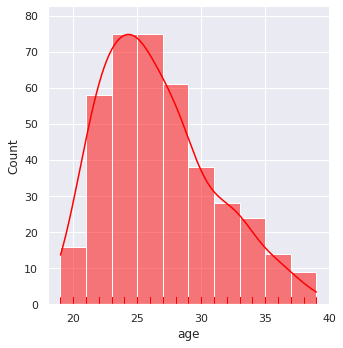

In [7]:
sns.displot(df.age, bins=10, kde=True, rug=True, color='red');

Pour afficher uniquement la densité estimée, il est préférable d'utiliser directement la fonction kdeplot, qui permet plus de personnalisation.

Les arguments shade clip et cut, par exemple, permettent respectivement de colorer l'air sous la courbe, de délimiter la courbe entre deux bornes, ou de couper ses extrémités.

Il convient de noter que la fonction displot permet également de rajouter les arguments propres à une des fonctions qu'elle utilise dans un dictionnaire portant le nom : {hist, kde, ecdf}_kws.

Exemple :
sns.distplot(df.var, hist=True, kde= True, kde_kws ={'clip': (5, 15)})

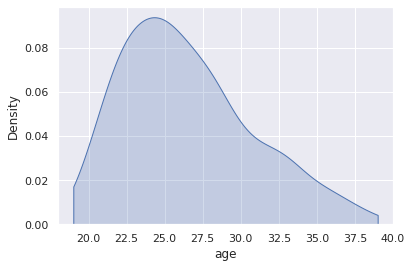

In [10]:
sns.kdeplot(df.age, shade=True, cut=0)
# ou sns.displot(df.age, kind = "kde", kde_kws ={'shade':True, 'cut': 0})


Il existe trois principaux types de graphiques pour analyser la distribution d'une variable continue: En plus des histogrammes et des estimations de la densité par noyaux (kde), vous pouvez également afficher les fonctions de répartitions cumulées empiriques (ECDF pour empirical cumulative distribution functions)

Une ECDF représente la proportion ou le nombre d'observations inférieurs à chaque valeur unique dans un ensemble de données. Par rapport à un histogramme ou à une courbe de densité, elle présente l'avantage de visualiser directement chaque observation, ce qui signifie qu'il n'y a pas de paramètres à ajuster. Elle permet également de comparer directement différentes distributions sur le même graphique. En revanche, les relation entre l'apparence de la courbe et les propriétés de base de la distribution (telles que sa tendance centrale, sa variance et la présence d'une bimodalité) sont moins évidentes.

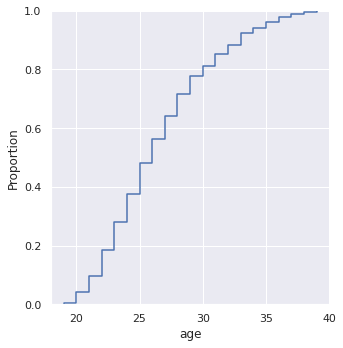

In [12]:
sns.displot(df.age, kind = "ecdf");

Lorsque la variable à analyser est une variable quantitative discrète ou catégorielle, un graphique qui peut aider à visualiser sa distribution est le diagramme en barre qui affiche le nombre d'éléments correspondant à chaque modalité de la variable.

Ce graphique est obtenu simplement grâce à la fonction countplot de Seaborn, qui accepte dans l'argument x une séquence de valeurs catégorielles ou quantitative discrète, ou le nom de la variable, si l'on précise le nom du data frame qui la contient dans l'argument data.

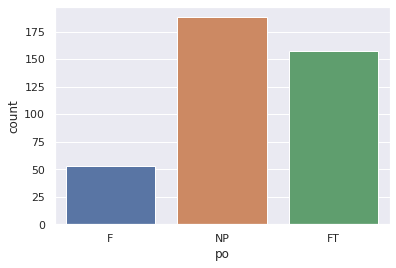

In [13]:
sns.countplot(x="po", data=df);

Si l'on souhaite calculer le nombre d'individus correspondant à chaque modalitéd'une variable, selon son appartenance à une autre variable, on peut rajouter l'argument hue.

Cet argument, très utile sur Seaborn permet de faire varier chaque type de graphique en fonction d'une autre variable catégorielle.



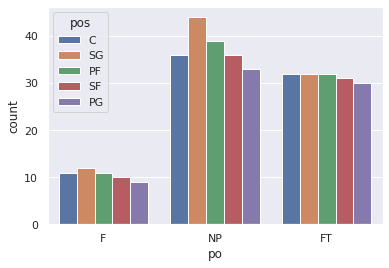

In [14]:
sns.countplot(x="po", hue ="pos", data=df);

# Graphiques multiples

FacetGrid
Lorsque l'exploration d'un jeu de données nécessite de visualiser la distribution d'une variable ou une relation entre plusieurs variables, à l'intérieur de sous-ensembles des données, la classe FacetGrid se révèle très utile. Les objets FacetGrid sont des Figures de Maltplotlib multi-dimensionnels qui permettent d'afficher des graphiques à partir de sous-ensembles de données divisés par lignes(row), par colonnes (col) et par une troisième dimension grâce à l'argument hue.

La majorité des fonctions utilisées dans ce tutoriel (relplot, catplot, lmplot) utilisent et retournent des objets FacetGrid directement, mais il est possible d'instancier ce type de graphiques manuellement afin de créer des graphiques particuliers et personnalisés

Pour créer une figure multi-graphiques à l'aide de la fonction FacetGrid, il suffit de lui donner en argument le nom du dataset et des variables à utiliser sur une ou plusieurs des 3 dimensions. La où les variables doivent être catégorielles ou discrètes. Une grille est ainsi créée et pour chaque variable utilisée le long d'un axe, la grille sépare les différents graphiques selon les modalités prises le long de cet axe.

Pour ajouter un graphique à chaque case de la grille ainsi crée, on utilise la méthode map à l'intérieur de laquelle on indique la fonction à utiliser et les différents paramètres à régler.



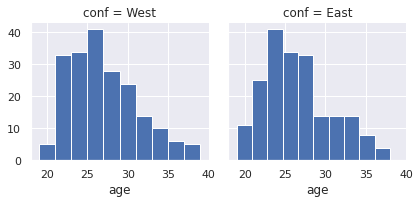

In [19]:
g = sns.FacetGrid(df, col="conf")
g.map(plt.hist, "age")

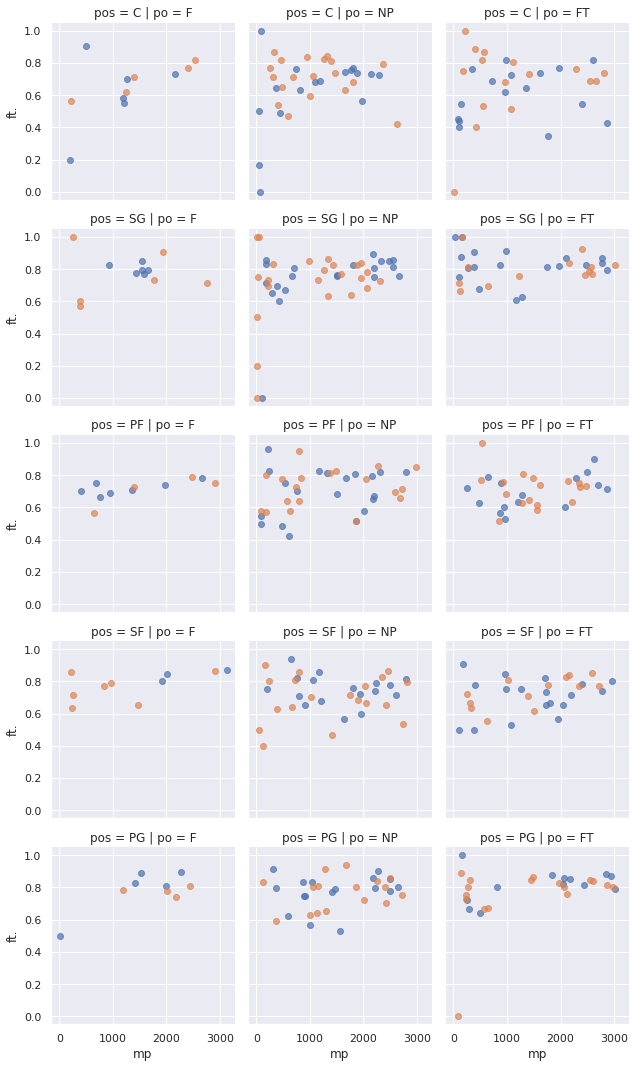

In [20]:
g = sns.FacetGrid(df, col="po", row='pos', hue='conf')
g.map(plt.scatter, "mp", "ft.", alpha=0.7)

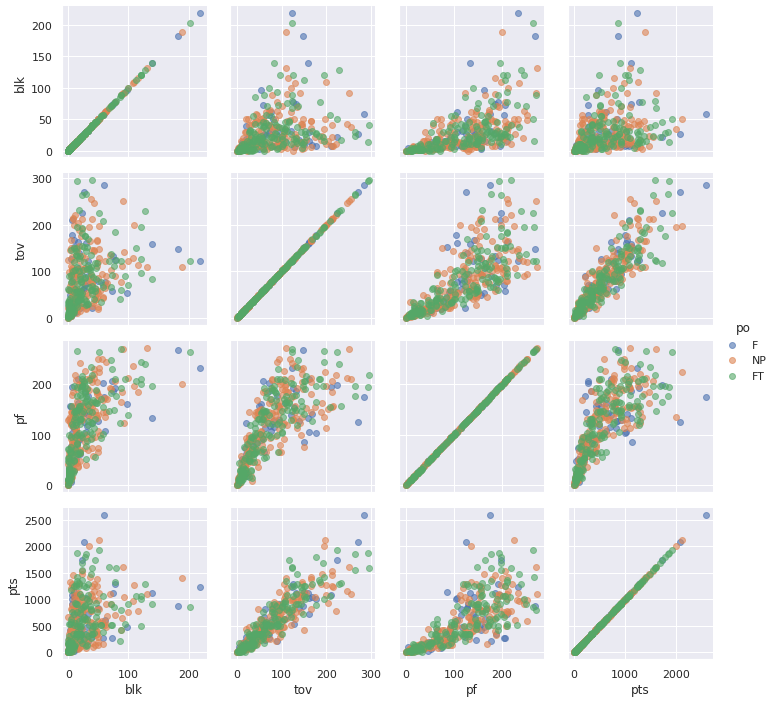

In [21]:
g = sns.PairGrid(df.iloc[:,14:21], hue= 'po')
g.map(plt.scatter, alpha=0.6)
g.add_legend()

In [ ]:
g = sns.PairGrid(df.iloc[:,1:6])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)